In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [32]:

#Répertoire du fichier des données
PROCESSED_DIR = '../data/processed/'

#Table principale
ALL_DATA_FILE = 'all_data.csv'

In [33]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update']).assign(day=lambda _df:_df['Last Update'].dt.date))

In [34]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,31.8257,117.2264,01-22-2020.csv,2020-01-22
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,40.1824,116.4142,01-22-2020.csv,2020-01-22
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,30.0572,107.8740,01-22-2020.csv,2020-01-22
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,26.0789,117.9874,01-22-2020.csv,2020-01-22
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,36.0611,103.8343,01-22-2020.csv,2020-01-22


In [35]:
epidemie_df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
Latitude                 float64
Longitude                float64
source                    object
day                       object
dtype: object

In [36]:
epidemie_df['Country/Region'].value_counts()

Mainland China                1517
US                            1055
Australia                      233
Canada                         151
China                           66
France                          53
Japan                           51
Thailand                        51
Singapore                       50
Vietnam                         49
Malaysia                        49
Nepal                           48
Hong Kong                       48
Macau                           48
Taiwan                          48
South Korea                     48
Sri Lanka                       46
Cambodia                        46
Germany                         45
Finland                         44
Philippines                     44
United Arab Emirates            44
India                           43
Sweden                          42
Italy                           42
Russia                          41
Spain                           41
UK                              40
Belgium             

# Epidémie en France

In [37]:
! pip install seaborn

In [38]:
import seaborn as sns

sns.set() #afficher les graphiques avec le look de Seaborn

In [39]:
%matplotlib inline

In [40]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
124,NaN,France,2020-01-24 17:00:00,2.0,NaN,NaN,47.0,2.0,01-24-2020.csv,2020-01-24
165,NaN,France,2020-01-25 17:00:00,3.0,NaN,NaN,47.0,2.0,01-25-2020.csv,2020-01-25
211,NaN,France,2020-01-26 16:00:00,3.0,NaN,NaN,47.0,2.0,01-26-2020.csv,2020-01-26
258,NaN,France,2020-01-27 23:59:00,3.0,NaN,NaN,47.0,2.0,01-27-2020.csv,2020-01-27
309,NaN,France,2020-01-28 23:00:00,4.0,NaN,NaN,47.0,2.0,01-28-2020.csv,2020-01-28


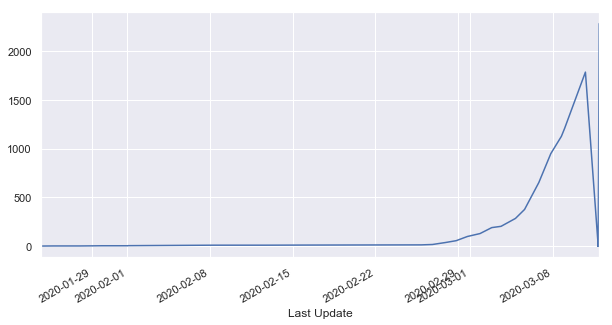

In [41]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('Last Update')['Confirmed'].plot(figsize=(10,5));

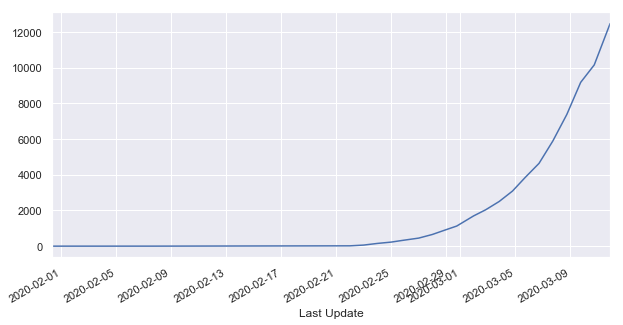

In [42]:
epidemie_df[epidemie_df['Country/Region'] == 'Italy'].set_index('Last Update')['Confirmed'].plot(figsize=(10,5));

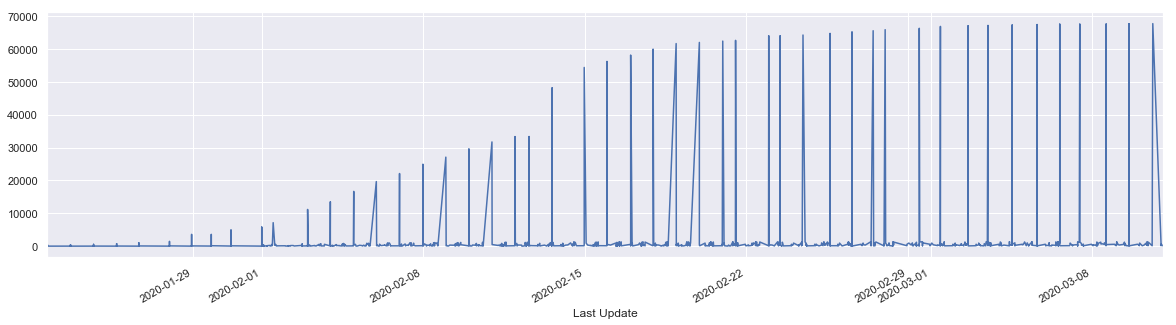

In [43]:
epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].set_index('Last Update')['Confirmed'].plot(figsize=(20,5));

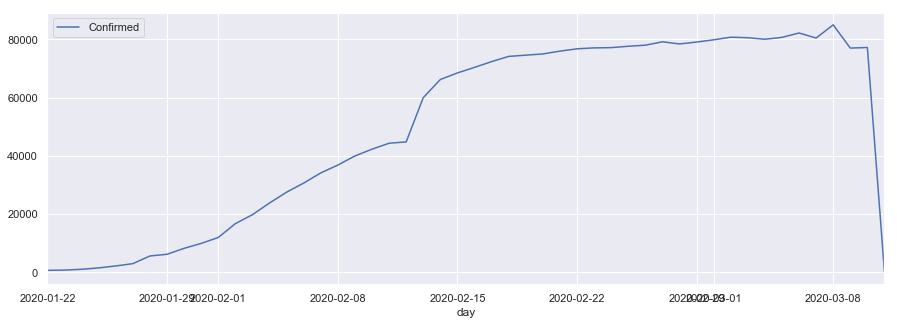

In [44]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].groupby('day').agg({'Confirmed': 'sum'})).plot(figsize=(15,5));

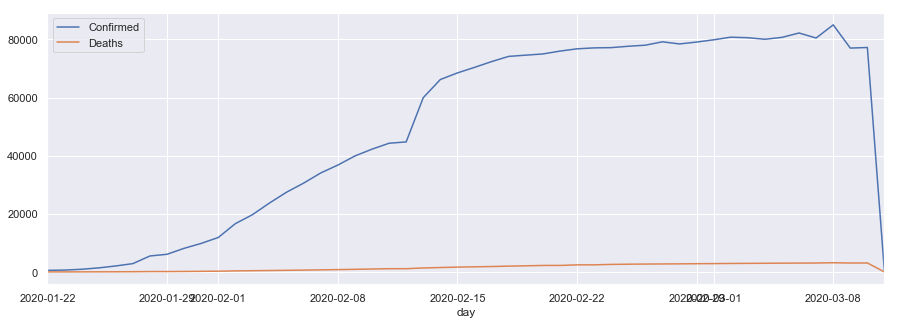

In [45]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby('day').agg({'Confirmed': 'sum', 'Deaths' : 'sum'})).plot(figsize=(15,5));

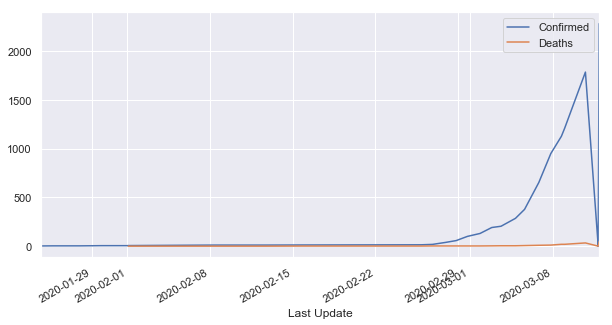

In [46]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('Last Update')[['Confirmed', 'Deaths']].plot(figsize=(10,5));

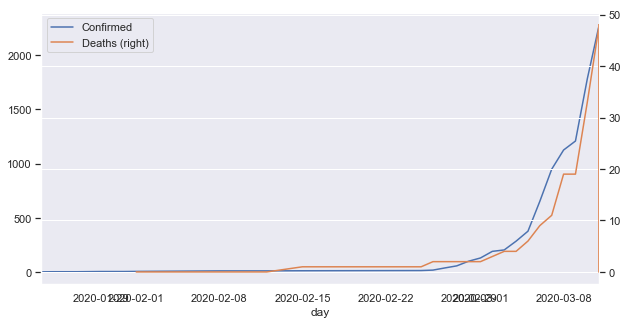

In [47]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
    .set_index('day')[ ['Confirmed', 'Deaths'] ]
    .plot(secondary_y=['Deaths'], figsize=(10, 5))
);

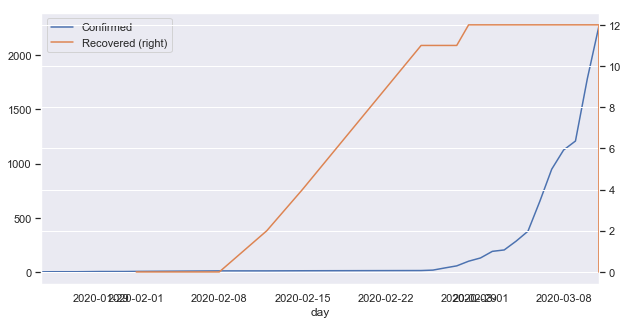

In [48]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
    .set_index('day')[ ['Confirmed', 'Recovered'] ]
    .plot(secondary_y=['Recovered'], figsize=(10, 5))
);

In [49]:
china_df = (epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
            .groupby('day')
            .agg({'Confirmed' : 'sum', 'Deaths' : 'sum' , 'Recovered' : 'sum'})
           )

In [50]:
china_df.head()

,Confirmed,Deaths,Recovered
day,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


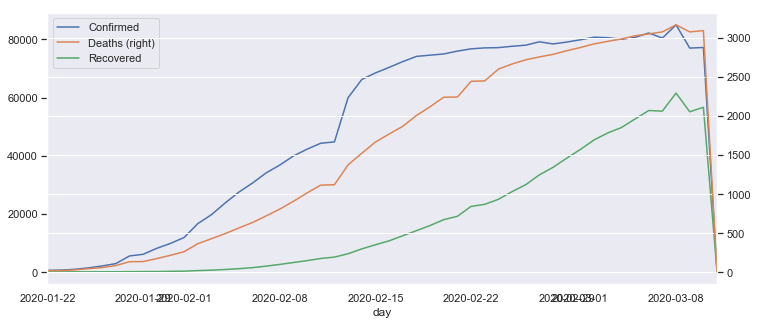

In [51]:
china_df.plot(secondary_y=['Deaths'], figsize=(12,5))

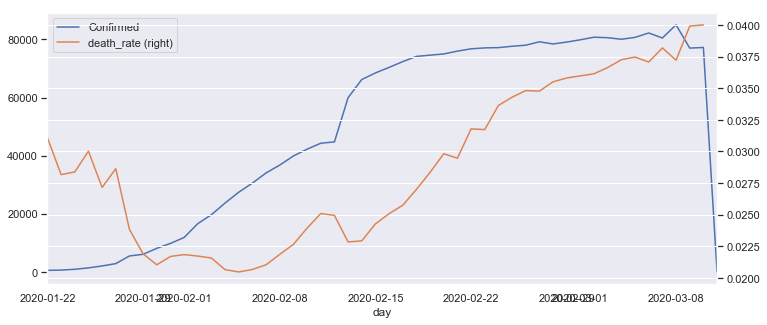

In [52]:
(china_df
 .assign(death_rate=lambda _df: _df['Deaths'] / _df['Confirmed'])[['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'], figsize=(12,5))
);

In [53]:
EUROPE = ['France', 'Germany', 'Italy', 'Spain']

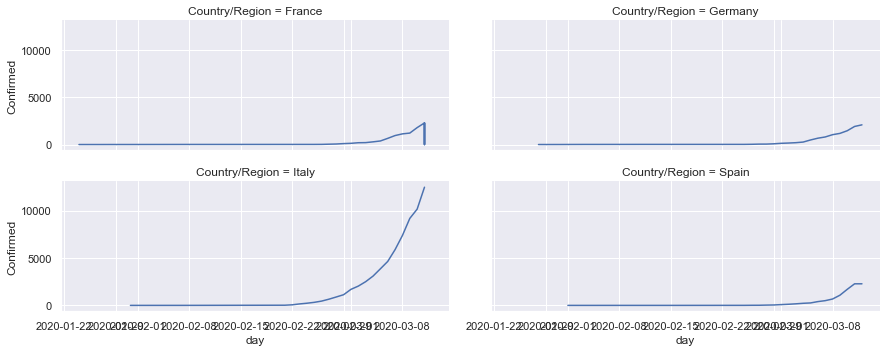

In [54]:
g = sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                col = "Country/Region", col_wrap=2, height=2.5, aspect=2.5)
g = g.map(plt.plot, 'day', 'Confirmed')

In [55]:
#import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, plot, iplot

In [56]:
import plotly.offline as py
import plotly.graph_objs as go

In [57]:
france_df = epidemie_df[epidemie_df['Country/Region']== 'France']

In [58]:
data = [go.Scatter(x=france_df['day'], y=france_df['Confirmed'])]

In [59]:
py.iplot(data)

In [60]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Confirmés/France'
                  ),
        go.Scatter(x=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['day'],
                   y=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['Confirmed'],
                   name='Confirmés/Allemagne'
                  )
       ]

layout = dict(
    title = "Epidémie Corona Virus",
    xaxis = dict(range = ['2020-01-22', '2020-03-05'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig)